# Comprehensive Analysis of v2.5 HDF5 Data

This notebook analyzes the structure and content of v2.5_0001.h5 file.

The file contains:
- **Input**: Geological and operational parameters
- **Metadata**: Version and scenario information
- **Output**: Simulation results over time

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [ ]:
# Load the HDF5 file
# Use relative path from repo root - assumes data in sample_data/ as per README
h5_path = '../sample_data/v2.5_0001.h5'
f = h5py.File(h5_path, 'r')

print(f"File: {h5_path}")
print(f"\nTop-level groups:")
for key in f.keys():
    print(f"  - {key}")

---
## Metadata Group

In [3]:
# Explore Metadata group
print("Metadata Fields:")
print("=" * 60)
for key in f['Metadata'].keys():
    value = f['Metadata'][key][()]
    if isinstance(value, bytes):
        value = value.decode('utf-8')
    print(f"  {key:25s}: {value}")

Metadata Fields:
  DataFormatVersion        : v2.5
  ModelVersion             : v2.0
  RepNum                   : 76
  SampleNum                : 1
  ScenarioName             : OPT_0001_01


---
## Input Group - Overview

In [4]:
# Overview of Input group
print("Input Fields:")
print("=" * 60)
for key in f['Input'].keys():
    dataset = f['Input'][key]
    print(f"  {key:25s}: shape={dataset.shape}, dtype={dataset.dtype}")

Input Fields:
  FaultId                  : shape=(326, 70, 76), dtype=int64
  InjRate                  : shape=(326, 70, 76), dtype=float64
  IsActive                 : shape=(326, 70, 76), dtype=uint8
  IsWell                   : shape=(326, 70, 76), dtype=int64
  ParamsScalar             : shape=(26,), dtype=float64
  PermX                    : shape=(326, 70, 76), dtype=float64
  PermY                    : shape=(326, 70, 76), dtype=float64
  PermZ                    : shape=(326, 70, 76), dtype=float64
  Porosity                 : shape=(326, 70, 76), dtype=float64
  Pressure0                : shape=(326, 70, 76), dtype=float64
  Temperature0             : shape=(326, 70, 76), dtype=float64


---
## Input Field: ParamsScalar

In [5]:
# Analyze ParamsScalar
params_scalar = f['Input/ParamsScalar'][:]

print(f"ParamsScalar shape: {params_scalar.shape}")
print(f"\nValues (26 parameters):")
for i, val in enumerate(params_scalar):
    print(f"  Param[{i:2d}]: {val:12.4f}")

print(f"\nStatistics:")
print(f"  Min:  {np.min(params_scalar):.4f}")
print(f"  Max:  {np.max(params_scalar):.4f}")
print(f"  Mean: {np.mean(params_scalar):.4f}")
print(f"  Std:  {np.std(params_scalar):.4f}")

# Check for -999 values
num_missing = np.sum(params_scalar == -999)
print(f"\nMissing values (-999): {num_missing} / {len(params_scalar)}")

ParamsScalar shape: (26,)

Values (26 parameters):
  Param[ 0]:       0.6543
  Param[ 1]:       0.6870
  Param[ 2]:       0.5492
  Param[ 3]:       0.1394
  Param[ 4]:       0.4518
  Param[ 5]:       0.5081
  Param[ 6]:       0.0785
  Param[ 7]:       0.5131
  Param[ 8]:       0.6636
  Param[ 9]:       0.7326
  Param[10]:       0.4893
  Param[11]:       0.0529
  Param[12]:       0.9573
  Param[13]:       0.4259
  Param[14]:       0.5958
  Param[15]:       0.0916
  Param[16]:       0.7418
  Param[17]:       0.2558
  Param[18]:       0.0091
  Param[19]:       0.4051
  Param[20]:       0.5749
  Param[21]:       0.5542
  Param[22]:       0.5060
  Param[23]:       0.5668
  Param[24]:       0.6061
  Param[25]:       0.3081

Statistics:
  Min:  0.0091
  Max:  0.9573
  Mean: 0.4661
  Std:  0.2355

Missing values (-999): 0 / 26


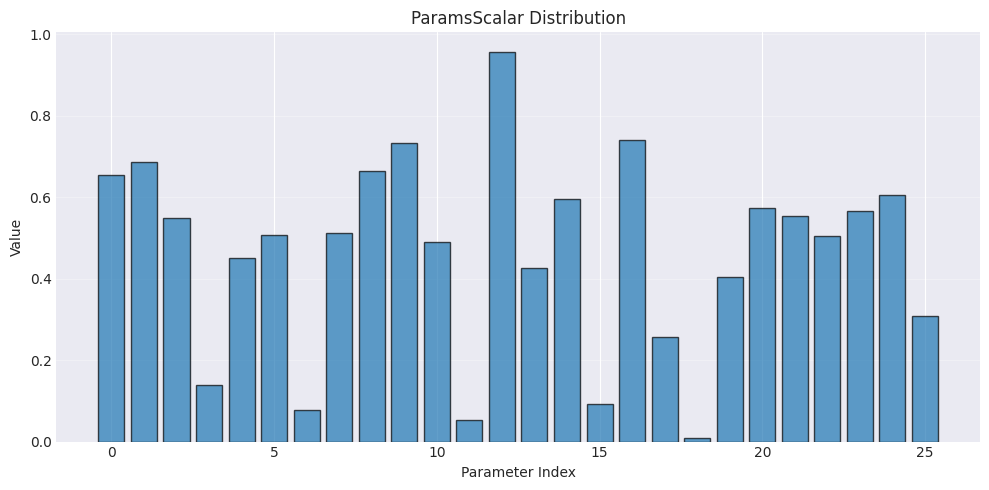

In [6]:
# ParamsScalar - Distribution
plt.figure(figsize=(10, 5))
plt.bar(range(len(params_scalar)), params_scalar, edgecolor='black', alpha=0.7)
plt.xlabel('Parameter Index')
plt.ylabel('Value')
plt.title('ParamsScalar Distribution')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

---
## Input Field: FaultId

In [7]:
# Load and analyze FaultId
fault_id = f['Input/FaultId'][:]

print(f"FaultId shape: {fault_id.shape}")
print(f"Dtype: {fault_id.dtype}")

# Identify unique fault IDs
unique_faults = np.unique(fault_id)
print(f"\nUnique Fault IDs: {unique_faults}")
print(f"Number of unique faults: {len(unique_faults)}")

# Count cells per fault
for fault in unique_faults:
    count = np.sum(fault_id == fault)
    pct = 100 * count / fault_id.size
    if fault == -999:
        print(f"  No Fault (ID={fault}): {count:8d} cells ({pct:5.2f}%)")
    else:
        print(f"  Fault ID {fault:4d}:     {count:8d} cells ({pct:5.2f}%)")

FaultId shape: (326, 70, 76)
Dtype: int64

Unique Fault IDs: [-999    1    2    3    4    5    7    8   10]
Number of unique faults: 9
  No Fault (ID=-999):  1469381 cells (84.72%)
  Fault ID    1:           76 cells ( 0.00%)
  Fault ID    2:        29501 cells ( 1.70%)
  Fault ID    3:         9493 cells ( 0.55%)
  Fault ID    4:        18556 cells ( 1.07%)
  Fault ID    5:        19155 cells ( 1.10%)
  Fault ID    7:          727 cells ( 0.04%)
  Fault ID    8:        12274 cells ( 0.71%)
  Fault ID   10:       175157 cells (10.10%)


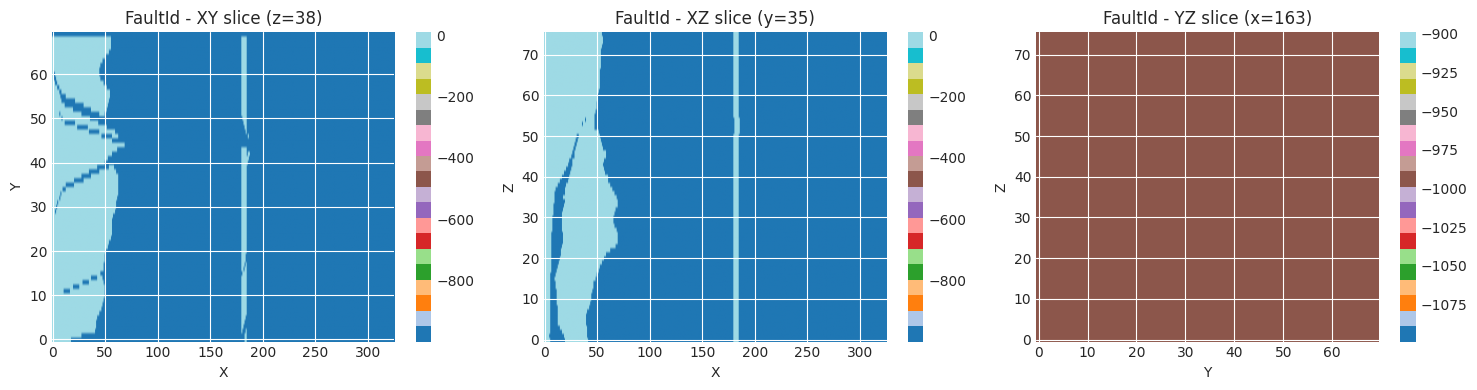

In [8]:
# Visualize FaultId
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

mid_z = fault_id.shape[2] // 2
mid_y = fault_id.shape[1] // 2
mid_x = fault_id.shape[0] // 2

im1 = axes[0].imshow(fault_id[:, :, mid_z].T, cmap='tab20', origin='lower', aspect='auto')
axes[0].set_title(f'FaultId - XY slice (z={mid_z})')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(fault_id[:, mid_y, :].T, cmap='tab20', origin='lower', aspect='auto')
axes[1].set_title(f'FaultId - XZ slice (y={mid_y})')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Z')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(fault_id[mid_x, :, :].T, cmap='tab20', origin='lower', aspect='auto')
axes[2].set_title(f'FaultId - YZ slice (x={mid_x})')
axes[2].set_xlabel('Y')
axes[2].set_ylabel('Z')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

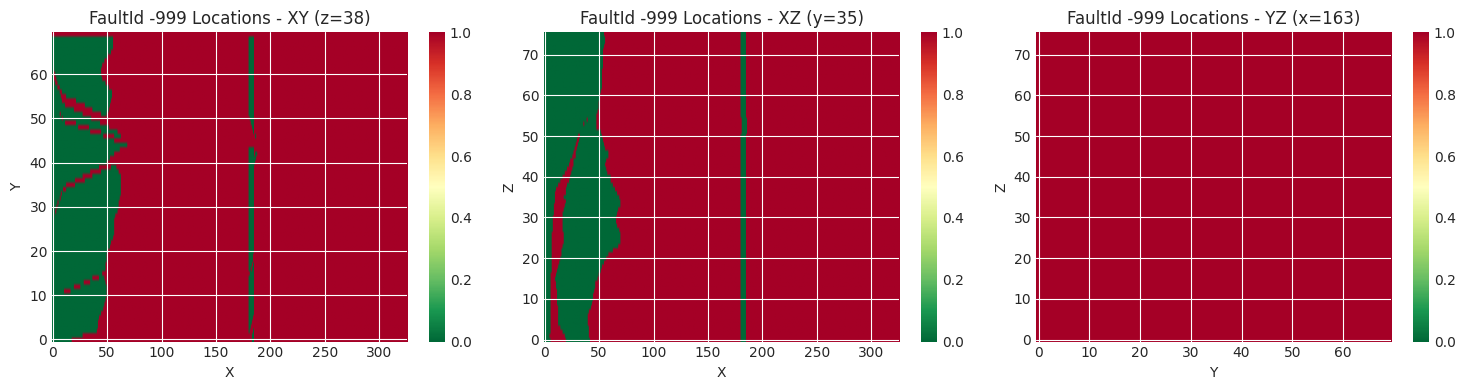

Total -999 values: 1469381 / 1734320 (84.72%)


In [9]:
# FaultId: -999 locations
missing_mask = (fault_id == -999).astype(int)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

im1 = axes[0].imshow(missing_mask[:, :, mid_z].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[0].set_title(f'FaultId -999 Locations - XY (z={mid_z})')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(missing_mask[:, mid_y, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[1].set_title(f'FaultId -999 Locations - XZ (y={mid_y})')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Z')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(missing_mask[mid_x, :, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[2].set_title(f'FaultId -999 Locations - YZ (x={mid_x})')
axes[2].set_xlabel('Y')
axes[2].set_ylabel('Z')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

print(f"Total -999 values: {np.sum(missing_mask)} / {fault_id.size} ({100*np.sum(missing_mask)/fault_id.size:.2f}%)")

---
## Input Fields: IsWell, InjRate, IsActive

In [10]:
# Load all three fields
is_well = f['Input/IsWell'][:]
inj_rate = f['Input/InjRate'][:]
is_active = f['Input/IsActive'][:]

# IsWell analysis
print("IsWell Analysis:")
print("=" * 60)
unique_vals = np.unique(is_well)
for val in unique_vals:
    count = np.sum(is_well == val)
    pct = 100 * count / is_well.size
    label = "No data" if val == -999 else ("No well" if val == 0 else "Well present")
    print(f"  Value {val:4.0f} ({label:13s}): {count:8d} cells ({pct:5.2f}%)")

# InjRate analysis
print("\nInjRate Analysis:")
print("=" * 60)
valid_mask = inj_rate != -999
valid_inj = inj_rate[valid_mask]
print(f"  Valid cells: {np.sum(valid_mask):8d} / {inj_rate.size}")
if len(valid_inj) > 0:
    print(f"  Min:  {np.min(valid_inj):.6f}")
    print(f"  Max:  {np.max(valid_inj):.6f}")
    print(f"  Mean: {np.mean(valid_inj):.6f}")
    print(f"  Std:  {np.std(valid_inj):.6f}")

injection_mask = (inj_rate != -999) & (inj_rate != 0)
print(f"  Cells with active injection: {np.sum(injection_mask)}")

# IsActive analysis
print("\nIsActive Analysis:")
print("=" * 60)
unique_vals = np.unique(is_active)
for val in unique_vals:
    count = np.sum(is_active == val)
    pct = 100 * count / is_active.size
    label = "No data" if val == -999 else ("Inactive" if val == 0 else "Active")
    print(f"  Value {val:4.0f} ({label:13s}): {count:8d} cells ({pct:5.2f}%)")

IsWell Analysis:
  Value -999 (No data      ):  1733784 cells (99.97%)
  Value    1 (Well present ):      536 cells ( 0.03%)

InjRate Analysis:
  Valid cells:      536 / 1734320
  Min:  -8000.000000
  Max:  8000.000000
  Mean: 89.552239
  Std:  7999.498759
  Cells with active injection: 536

IsActive Analysis:
  Value    0 (Inactive     ):  1469381 cells (84.72%)
  Value    1 (Active       ):   264939 cells (15.28%)


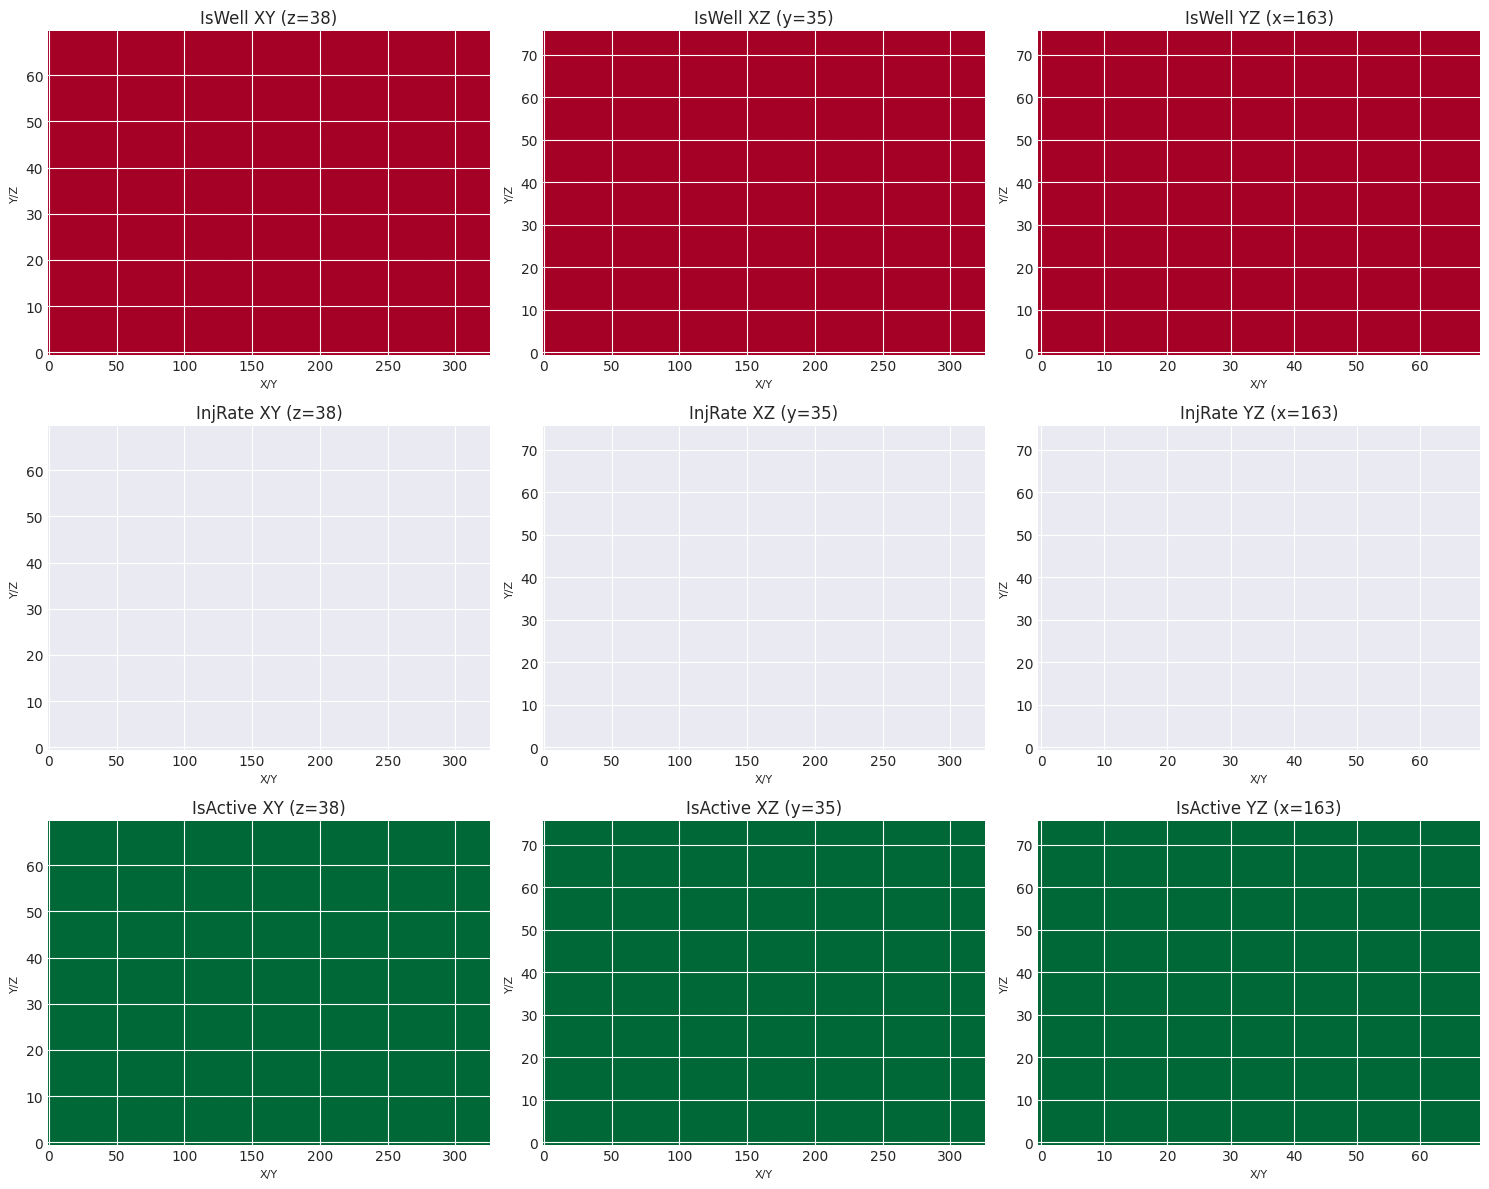

In [11]:
# Visualize IsWell, InjRate, IsActive
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# IsWell
axes[0, 0].imshow(is_well[:, :, mid_z].T, cmap='RdYlGn', origin='lower', aspect='auto', vmin=-999, vmax=1)
axes[0, 0].set_title(f'IsWell XY (z={mid_z})')
axes[0, 1].imshow(is_well[:, mid_y, :].T, cmap='RdYlGn', origin='lower', aspect='auto', vmin=-999, vmax=1)
axes[0, 1].set_title(f'IsWell XZ (y={mid_y})')
axes[0, 2].imshow(is_well[mid_x, :, :].T, cmap='RdYlGn', origin='lower', aspect='auto', vmin=-999, vmax=1)
axes[0, 2].set_title(f'IsWell YZ (x={mid_x})')

# InjRate
inj_rate_masked = np.ma.masked_where(inj_rate == -999, inj_rate)
axes[1, 0].imshow(inj_rate_masked[:, :, mid_z].T, cmap='plasma', origin='lower', aspect='auto')
axes[1, 0].set_title(f'InjRate XY (z={mid_z})')
axes[1, 1].imshow(inj_rate_masked[:, mid_y, :].T, cmap='plasma', origin='lower', aspect='auto')
axes[1, 1].set_title(f'InjRate XZ (y={mid_y})')
axes[1, 2].imshow(inj_rate_masked[mid_x, :, :].T, cmap='plasma', origin='lower', aspect='auto')
axes[1, 2].set_title(f'InjRate YZ (x={mid_x})')

# IsActive
axes[2, 0].imshow(is_active[:, :, mid_z].T, cmap='RdYlGn', origin='lower', aspect='auto', vmin=-999, vmax=1)
axes[2, 0].set_title(f'IsActive XY (z={mid_z})')
axes[2, 1].imshow(is_active[:, mid_y, :].T, cmap='RdYlGn', origin='lower', aspect='auto', vmin=-999, vmax=1)
axes[2, 1].set_title(f'IsActive XZ (y={mid_y})')
axes[2, 2].imshow(is_active[mid_x, :, :].T, cmap='RdYlGn', origin='lower', aspect='auto', vmin=-999, vmax=1)
axes[2, 2].set_title(f'IsActive YZ (x={mid_x})')

for ax in axes.flat:
    ax.set_xlabel('X/Y', fontsize=8)
    ax.set_ylabel('Y/Z', fontsize=8)

plt.tight_layout()
plt.show()

---
## Input Field: Porosity

In [12]:
# Analyze Porosity
porosity = f['Input/Porosity'][:]

print(f"Porosity shape: {porosity.shape}")
print(f"Dtype: {porosity.dtype}")

# Mask out -999 values
valid_mask = porosity != -999
valid_por = porosity[valid_mask]

print(f"\nStatistics (excluding -999):")
print(f"  Valid cells: {np.sum(valid_mask):8d} / {porosity.size}")
if len(valid_por) > 0:
    print(f"  Min:  {np.min(valid_por):.6f}")
    print(f"  Max:  {np.max(valid_por):.6f}")
    print(f"  Mean: {np.mean(valid_por):.6f}")
    print(f"  Std:  {np.std(valid_por):.6f}")
    
    print(f"\nPercentiles:")
    for p in [10, 25, 50, 75, 90]:
        print(f"  P{p:2d}: {np.percentile(valid_por, p):.6f}")

porosity_missing = np.sum(porosity == -999)
print(f"\nMissing values: {porosity_missing} / {porosity.size} ({100*porosity_missing/porosity.size:.2f}%)")

Porosity shape: (326, 70, 76)
Dtype: float64

Statistics (excluding -999):
  Valid cells:   264939 / 1734320
  Min:  0.000000
  Max:  0.149545
  Mean: 0.056005
  Std:  0.039993

Percentiles:
  P10: 0.000000
  P25: 0.000000
  P50: 0.062625
  P75: 0.086890
  P90: 0.102743

Missing values: 1469381 / 1734320 (84.72%)


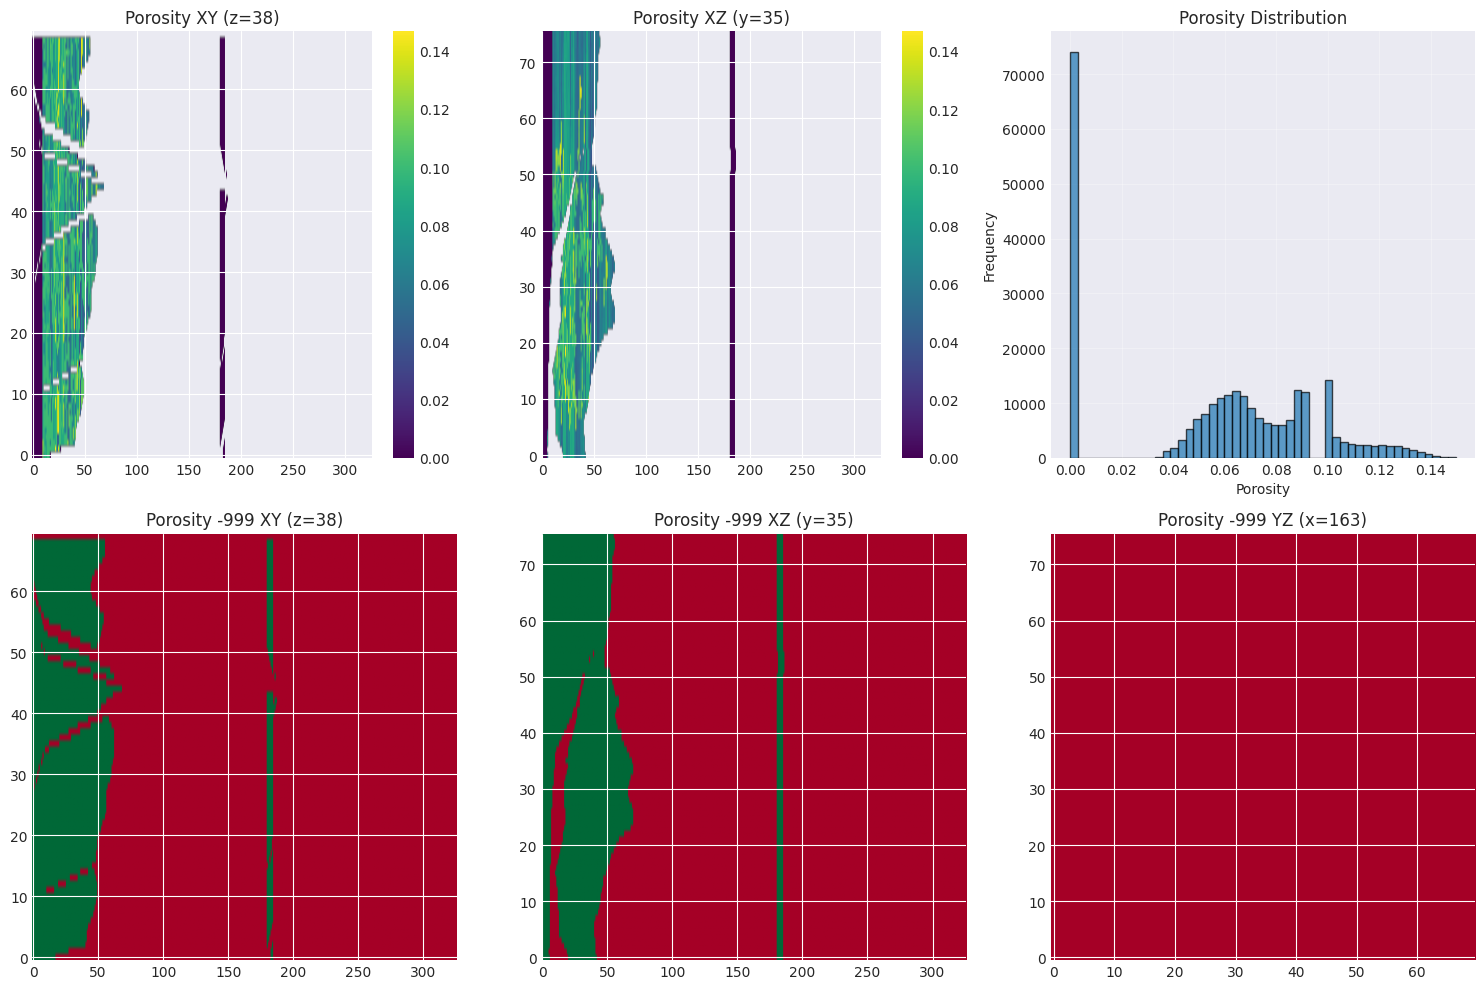

In [13]:
# Visualize Porosity with histogram and -999 locations
porosity_masked = np.ma.masked_where(porosity == -999, porosity)
porosity_missing_mask = (porosity == -999).astype(int)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Porosity values (top row)
im = axes[0, 0].imshow(porosity_masked[:, :, mid_z].T, cmap='viridis', origin='lower', aspect='auto')
axes[0, 0].set_title(f'Porosity XY (z={mid_z})')
plt.colorbar(im, ax=axes[0, 0])

im = axes[0, 1].imshow(porosity_masked[:, mid_y, :].T, cmap='viridis', origin='lower', aspect='auto')
axes[0, 1].set_title(f'Porosity XZ (y={mid_y})')
plt.colorbar(im, ax=axes[0, 1])

if len(valid_por) > 0:
    axes[0, 2].hist(valid_por, bins=50, edgecolor='black', alpha=0.7)
    axes[0, 2].set_xlabel('Porosity')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].set_title('Porosity Distribution')
    axes[0, 2].grid(True, alpha=0.3)

# -999 locations (bottom row)
axes[1, 0].imshow(porosity_missing_mask[:, :, mid_z].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[1, 0].set_title(f'Porosity -999 XY (z={mid_z})')

axes[1, 1].imshow(porosity_missing_mask[:, mid_y, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[1, 1].set_title(f'Porosity -999 XZ (y={mid_y})')

axes[1, 2].imshow(porosity_missing_mask[mid_x, :, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[1, 2].set_title(f'Porosity -999 YZ (x={mid_x})')

plt.tight_layout()
plt.show()

---
## Input Fields: PermX, PermY, PermZ

In [14]:
# Analyze all three permeability fields
perm_x = f['Input/PermX'][:]
perm_y = f['Input/PermY'][:]
perm_z = f['Input/PermZ'][:]

print("Permeability Analysis")
print("=" * 60)

for name, perm in [('PermX', perm_x), ('PermY', perm_y), ('PermZ', perm_z)]:
    valid_mask = perm != -999
    valid_perm = perm[valid_mask]
    missing_count = np.sum(~valid_mask)
    
    print(f"\n{name}:")
    print(f"  Shape: {perm.shape}")
    print(f"  Valid cells: {np.sum(valid_mask):8d} / {perm.size}")
    print(f"  Missing (-999): {missing_count:8d} ({100*missing_count/perm.size:.2f}%)")
    if len(valid_perm) > 0:
        print(f"  Min:  {np.min(valid_perm):.6e}")
        print(f"  Max:  {np.max(valid_perm):.6e}")
        print(f"  Mean: {np.mean(valid_perm):.6e}")
        print(f"  Std:  {np.std(valid_perm):.6e}")

Permeability Analysis

PermX:
  Shape: (326, 70, 76)
  Valid cells:   264939 / 1734320
  Missing (-999):  1469381 (84.72%)
  Min:  0.000000e+00
  Max:  1.710133e+03
  Mean: 5.681692e+01
  Std:  1.510043e+02

PermY:
  Shape: (326, 70, 76)
  Valid cells:   264939 / 1734320
  Missing (-999):  1469381 (84.72%)
  Min:  0.000000e+00
  Max:  1.710133e+03
  Mean: 5.681692e+01
  Std:  1.510043e+02

PermZ:
  Shape: (326, 70, 76)
  Valid cells:   264939 / 1734320
  Missing (-999):  1469381 (84.72%)
  Min:  0.000000e+00
  Max:  4.419948e+02
  Mean: 1.468469e+01
  Std:  3.902802e+01


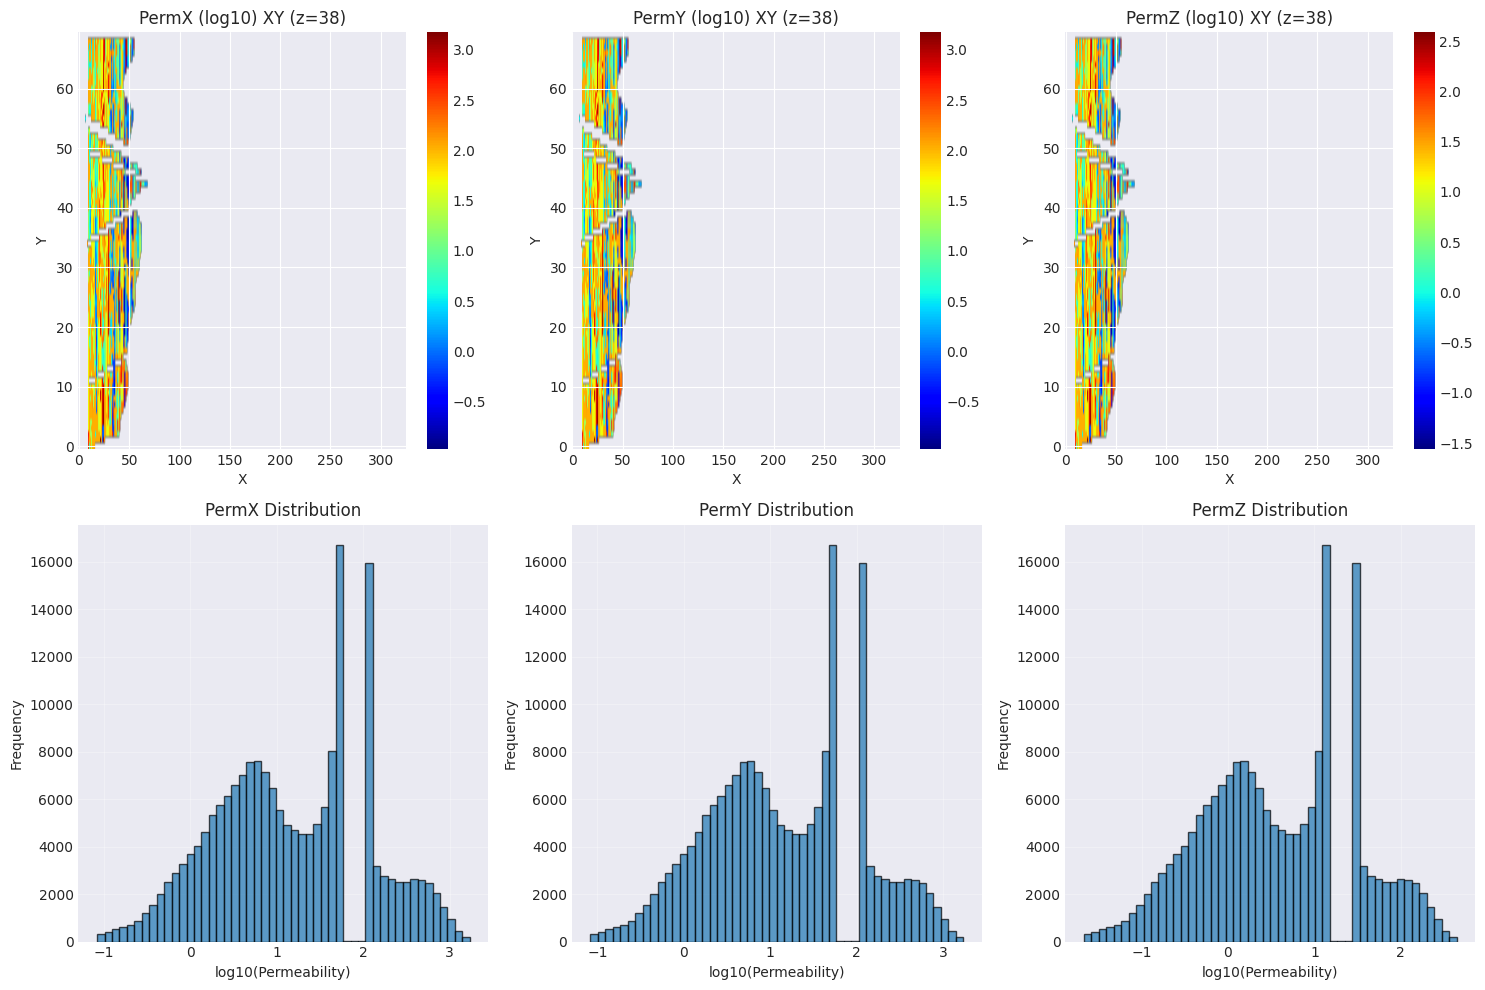

In [15]:
# Visualize permeability (log scale) and distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (name, perm) in enumerate([('PermX', perm_x), ('PermY', perm_y), ('PermZ', perm_z)]):
    # Top row: log scale spatial
    perm_masked = np.ma.masked_where(perm == -999, perm)
    perm_log = np.ma.log10(np.ma.masked_less_equal(perm_masked, 0))
    
    im = axes[0, idx].imshow(perm_log[:, :, mid_z].T, cmap='jet', origin='lower', aspect='auto')
    axes[0, idx].set_title(f'{name} (log10) XY (z={mid_z})')
    axes[0, idx].set_xlabel('X')
    axes[0, idx].set_ylabel('Y')
    plt.colorbar(im, ax=axes[0, idx])
    
    # Bottom row: histogram of log values
    valid_perm = perm[perm != -999]
    if len(valid_perm) > 0:
        log_perm = np.log10(valid_perm[valid_perm > 0])
        if len(log_perm) > 0:
            axes[1, idx].hist(log_perm, bins=50, edgecolor='black', alpha=0.7)
            axes[1, idx].set_xlabel('log10(Permeability)')
            axes[1, idx].set_ylabel('Frequency')
            axes[1, idx].set_title(f'{name} Distribution')
            axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

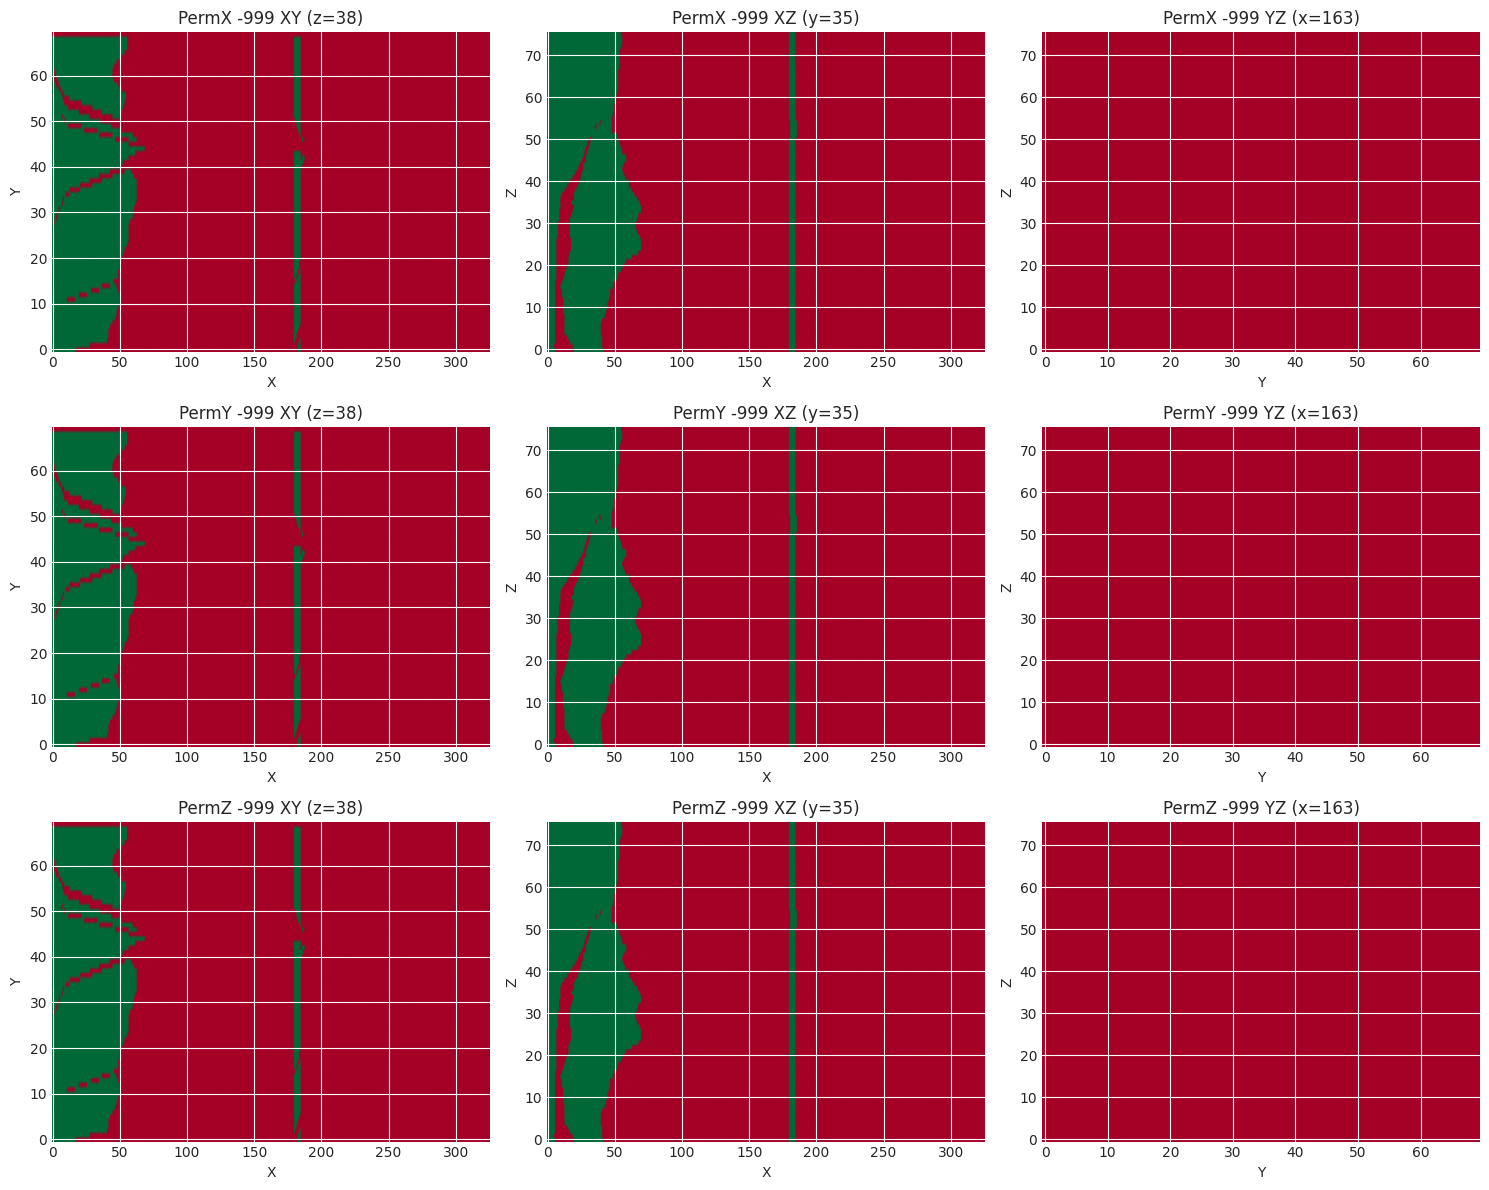

In [16]:
# Permeability: -999 locations
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for row, (name, perm) in enumerate([('PermX', perm_x), ('PermY', perm_y), ('PermZ', perm_z)]):
    missing = (perm == -999).astype(int)
    
    axes[row, 0].imshow(missing[:, :, mid_z].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
    axes[row, 0].set_title(f'{name} -999 XY (z={mid_z})')
    axes[row, 0].set_xlabel('X')
    axes[row, 0].set_ylabel('Y')
    
    axes[row, 1].imshow(missing[:, mid_y, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
    axes[row, 1].set_title(f'{name} -999 XZ (y={mid_y})')
    axes[row, 1].set_xlabel('X')
    axes[row, 1].set_ylabel('Z')
    
    axes[row, 2].imshow(missing[mid_x, :, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
    axes[row, 2].set_title(f'{name} -999 YZ (x={mid_x})')
    axes[row, 2].set_xlabel('Y')
    axes[row, 2].set_ylabel('Z')

plt.tight_layout()
plt.show()

---
## Input Fields: Pressure0 & Temperature0

In [17]:
# Analyze Pressure0 and Temperature0
pressure0 = f['Input/Pressure0'][:]
temperature0 = f['Input/Temperature0'][:]

for name, data in [('Pressure0', pressure0), ('Temperature0', temperature0)]:
    print(f"\n{name} Analysis:")
    print("=" * 60)
    valid_mask = data != -999
    valid_data = data[valid_mask]
    
    print(f"  Shape: {data.shape}")
    print(f"  Valid cells: {np.sum(valid_mask):8d} / {data.size}")
    print(f"  Missing: {np.sum(~valid_mask):8d} ({100*np.sum(~valid_mask)/data.size:.2f}%)")
    
    if len(valid_data) > 0:
        print(f"  Min:  {np.min(valid_data):.4f}")
        print(f"  Max:  {np.max(valid_data):.4f}")
        print(f"  Mean: {np.mean(valid_data):.4f}")
        print(f"  Std:  {np.std(valid_data):.4f}")
        print(f"  Percentiles: P25={np.percentile(valid_data, 25):.2f}, P50={np.percentile(valid_data, 50):.2f}, P75={np.percentile(valid_data, 75):.2f}")


Pressure0 Analysis:
  Shape: (326, 70, 76)
  Valid cells:   264939 / 1734320
  Missing:  1469381 (84.72%)
  Min:  0.0000
  Max:  291.1552
  Mean: 171.5025
  Std:  108.0248
  Percentiles: P25=0.00, P50=227.48, P75=248.04

Temperature0 Analysis:
  Shape: (326, 70, 76)
  Valid cells:   264939 / 1734320
  Missing:  1469381 (84.72%)
  Min:  39.1488
  Max:  114.0972
  Mean: 92.8632
  Std:  6.8640
  Percentiles: P25=88.98, P50=93.02, P75=97.44


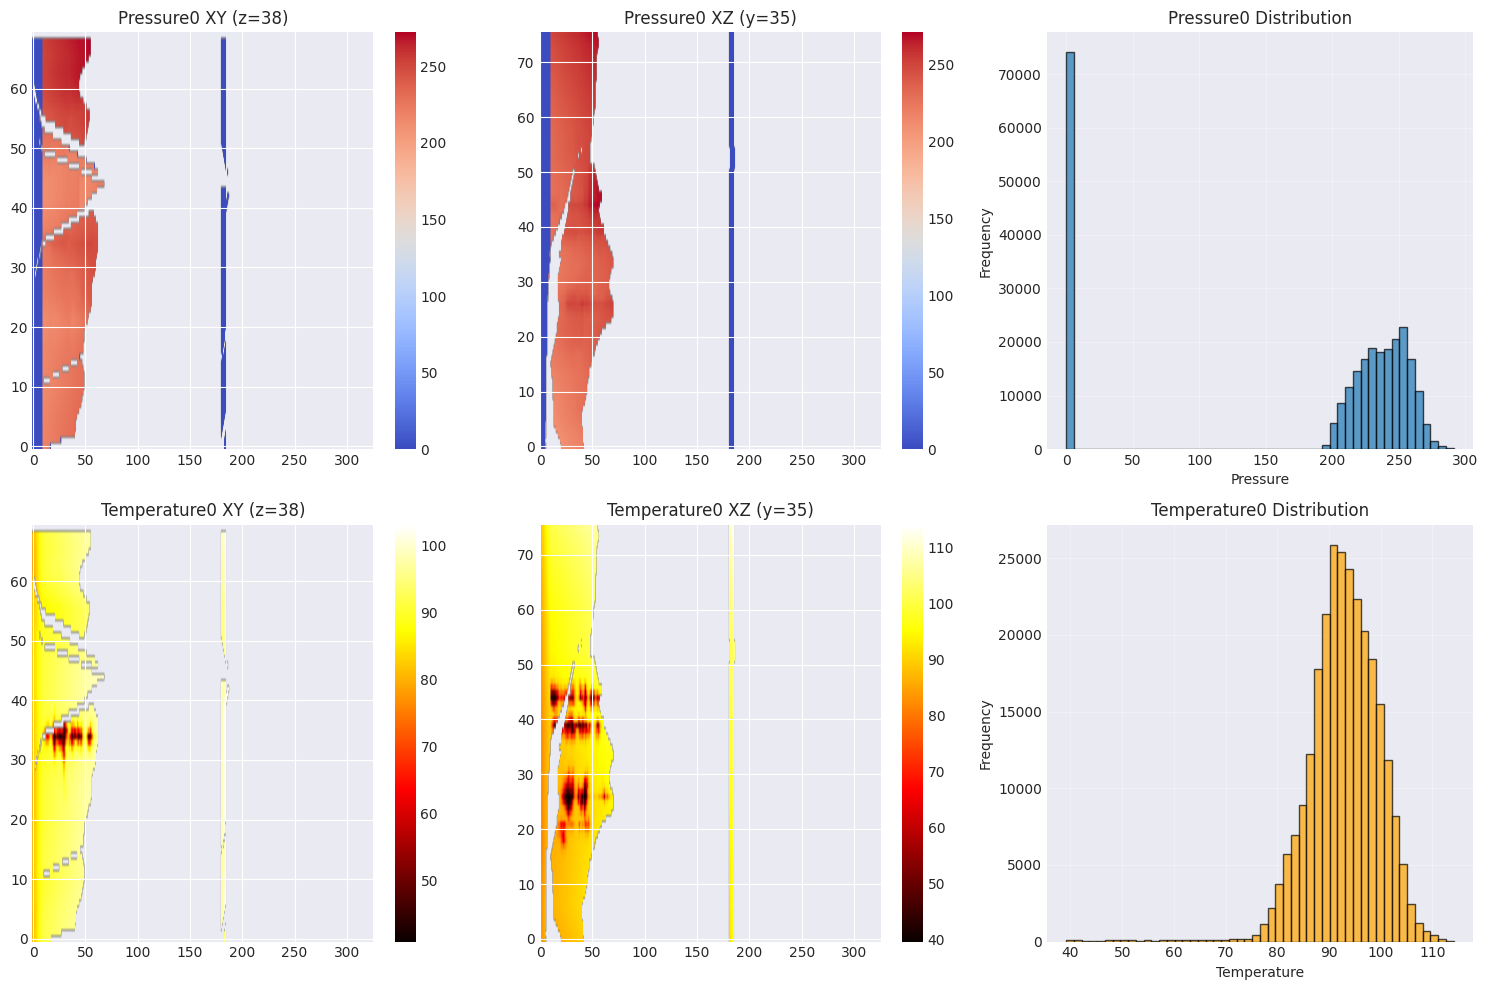

In [18]:
# Visualize Pressure0 and Temperature0 with distributions
pressure0_masked = np.ma.masked_where(pressure0 == -999, pressure0)
temperature0_masked = np.ma.masked_where(temperature0 == -999, temperature0)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Pressure0
im = axes[0, 0].imshow(pressure0_masked[:, :, mid_z].T, cmap='coolwarm', origin='lower', aspect='auto')
axes[0, 0].set_title(f'Pressure0 XY (z={mid_z})')
plt.colorbar(im, ax=axes[0, 0])

im = axes[0, 1].imshow(pressure0_masked[:, mid_y, :].T, cmap='coolwarm', origin='lower', aspect='auto')
axes[0, 1].set_title(f'Pressure0 XZ (y={mid_y})')
plt.colorbar(im, ax=axes[0, 1])

valid_pres = pressure0[pressure0 != -999]
if len(valid_pres) > 0:
    axes[0, 2].hist(valid_pres, bins=50, edgecolor='black', alpha=0.7)
    axes[0, 2].set_title('Pressure0 Distribution')
    axes[0, 2].set_xlabel('Pressure')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].grid(True, alpha=0.3)

# Temperature0
im = axes[1, 0].imshow(temperature0_masked[:, :, mid_z].T, cmap='hot', origin='lower', aspect='auto')
axes[1, 0].set_title(f'Temperature0 XY (z={mid_z})')
plt.colorbar(im, ax=axes[1, 0])

im = axes[1, 1].imshow(temperature0_masked[:, mid_y, :].T, cmap='hot', origin='lower', aspect='auto')
axes[1, 1].set_title(f'Temperature0 XZ (y={mid_y})')
plt.colorbar(im, ax=axes[1, 1])

valid_temp = temperature0[temperature0 != -999]
if len(valid_temp) > 0:
    axes[1, 2].hist(valid_temp, bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1, 2].set_title('Temperature0 Distribution')
    axes[1, 2].set_xlabel('Temperature')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

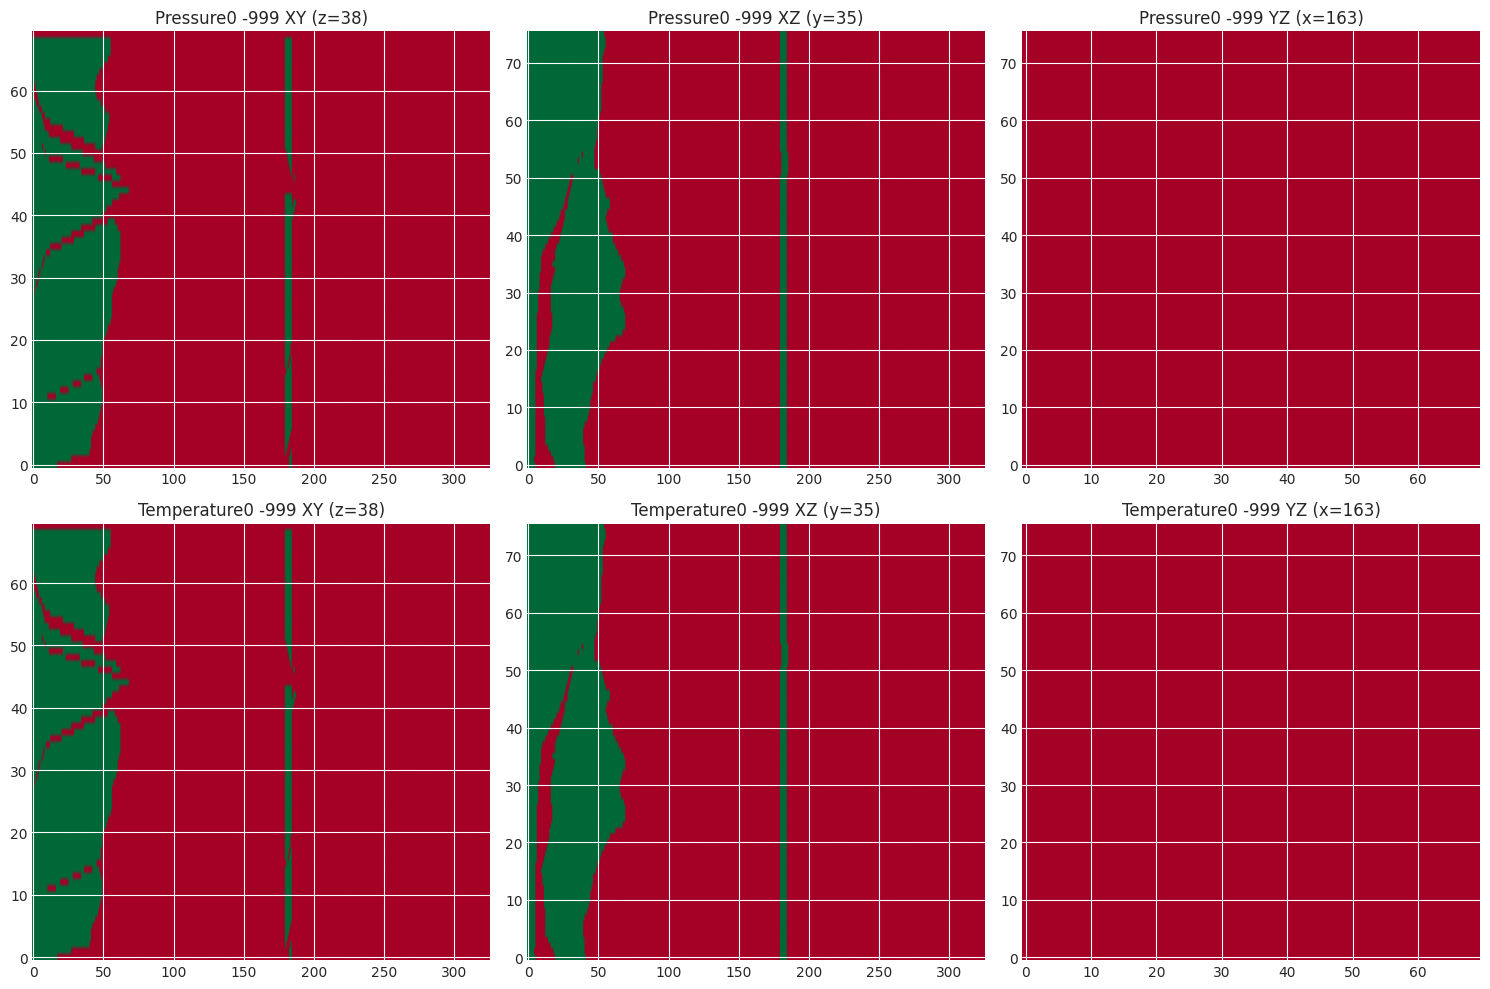

Pressure0 -999: 1469381 (84.72%)
Temperature0 -999: 1469381 (84.72%)


In [19]:
# Pressure0 & Temperature0: -999 locations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

pressure0_missing = (pressure0 == -999).astype(int)
temperature0_missing = (temperature0 == -999).astype(int)

axes[0, 0].imshow(pressure0_missing[:, :, mid_z].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[0, 0].set_title(f'Pressure0 -999 XY (z={mid_z})')

axes[0, 1].imshow(pressure0_missing[:, mid_y, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[0, 1].set_title(f'Pressure0 -999 XZ (y={mid_y})')

axes[0, 2].imshow(pressure0_missing[mid_x, :, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[0, 2].set_title(f'Pressure0 -999 YZ (x={mid_x})')

axes[1, 0].imshow(temperature0_missing[:, :, mid_z].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[1, 0].set_title(f'Temperature0 -999 XY (z={mid_z})')

axes[1, 1].imshow(temperature0_missing[:, mid_y, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[1, 1].set_title(f'Temperature0 -999 XZ (y={mid_y})')

axes[1, 2].imshow(temperature0_missing[mid_x, :, :].T, cmap='RdYlGn_r', origin='lower', aspect='auto', vmin=0, vmax=1)
axes[1, 2].set_title(f'Temperature0 -999 YZ (x={mid_x})')

plt.tight_layout()
plt.show()

print(f"Pressure0 -999: {np.sum(pressure0_missing)} ({100*np.sum(pressure0_missing)/pressure0.size:.2f}%)")
print(f"Temperature0 -999: {np.sum(temperature0_missing)} ({100*np.sum(temperature0_missing)/temperature0.size:.2f}%)")

---
## Output Group - Overview

In [20]:
# Load all output fields
pressure = f['Output/Pressure'][:]
temperature = f['Output/Temperature'][:]
wept = f['Output/WEPT'][:]

print("Output Fields:")
print("=" * 60)
for key in f['Output'].keys():
    dataset = f['Output'][key]
    print(f"  {key:35s}: shape={dataset.shape}, dtype={dataset.dtype}")

Output Fields:
  FieldEnergyInjectionRate           : shape=(30,), dtype=float64
  FieldEnergyProductionRate          : shape=(30,), dtype=float64
  FieldEnergyProductionTotal         : shape=(30,), dtype=float64
  FieldWaterInjectionRate            : shape=(30,), dtype=float64
  FieldWaterProductionRate           : shape=(30,), dtype=float64
  Pressure                           : shape=(30, 326, 70, 76), dtype=float64
  Temperature                        : shape=(30, 326, 70, 76), dtype=float64
  WEPT                               : shape=(30, 326, 70, 76), dtype=float64


---
## Output: Pressure - Temporal Analysis

In [21]:
# Pressure statistics by time step
print("PRESSURE ANALYSIS")
print("=" * 80)
print(f"Shape: {pressure.shape} (spatial: {pressure.shape[:3]}, time: {pressure.shape[3]})")

print(f"\nStatistics by time step (excluding -999):")
print(f"{'Step':>5s} {'Valid':>10s} {'Min':>12s} {'Max':>12s} {'Mean':>12s} {'Std':>12s}")
print("-" * 70)

for t in range(0, pressure.shape[3], 5):
    p_t = pressure[:, :, :, t]
    valid_mask = p_t != -999
    if np.sum(valid_mask) > 0:
        valid_p = p_t[valid_mask]
        print(f"{t:5d} {np.sum(valid_mask):10d} {np.min(valid_p):12.2f} {np.max(valid_p):12.2f} {np.mean(valid_p):12.2f} {np.std(valid_p):12.2f}")

PRESSURE ANALYSIS
Shape: (30, 326, 70, 76) (spatial: (30, 326, 70), time: 76)

Statistics by time step (excluding -999):
 Step      Valid          Min          Max         Mean          Std
----------------------------------------------------------------------
    0      39208         0.00       283.55       153.62       120.66
    5      81519         0.00       285.72       152.64       111.32
   10      89349         0.00       288.65       161.90       110.75
   15      93670         0.00       292.61       169.63       112.19
   20      97933         0.00       295.16       177.37       112.31
   25     102370         0.00       296.54       180.79       111.16
   30     102689         0.00       302.03       178.36       109.64
   35     105966         0.00       296.22       176.33       107.20
   40     108721         0.00       293.67       178.08       107.82
   45     110084         0.00       298.52       179.93       108.16
   50     107242         0.00       290.44       

In [22]:
# Pressure temporal differences (t to t+1)
pressure_diffs = np.diff(pressure, axis=3)

print(f"\nPRESSURE TEMPORAL DIFFERENCES")
print("=" * 80)
print(f"Differences shape: {pressure_diffs.shape}")

# Collect all valid differences
all_valid_diffs = []
for t in range(pressure_diffs.shape[3]):
    valid_mask = (pressure[:, :, :, t] != -999) & (pressure[:, :, :, t+1] != -999)
    if np.sum(valid_mask) > 0:
        diff_t = pressure_diffs[:, :, :, t]
        all_valid_diffs.append(diff_t[valid_mask])

if len(all_valid_diffs) > 0:
    all_valid_diffs = np.concatenate(all_valid_diffs)
    mean_diff = np.mean(all_valid_diffs)
    std_diff = np.std(all_valid_diffs)
    
    print(f"\nOverall difference statistics:")
    print(f"  Mean: {mean_diff:.4f}")
    print(f"  Std:  {std_diff:.4f}")
    print(f"  Min:  {np.min(all_valid_diffs):.4f}")
    print(f"  Max:  {np.max(all_valid_diffs):.4f}")
    print(f"  Extreme threshold (±3σ): [{mean_diff - 3*std_diff:.2f}, {mean_diff + 3*std_diff:.2f}]")
    
    # Count extreme changes
    extreme_threshold = 3 * std_diff
    print(f"\nExtreme changes by time step:")
    for t in [0, 5, 10, 15, 20, 28]:
        if t < pressure_diffs.shape[3]:
            valid_mask = (pressure[:, :, :, t] != -999) & (pressure[:, :, :, t+1] != -999)
            if np.sum(valid_mask) > 0:
                diff_t = pressure_diffs[:, :, :, t]
                extreme_mask = np.abs(diff_t - mean_diff) > extreme_threshold
                extreme_and_valid = extreme_mask & valid_mask
                num_extreme = np.sum(extreme_and_valid)
                pct_extreme = 100 * num_extreme / np.sum(valid_mask)
                print(f"  t={t:2d}->{t+1:2d}: {num_extreme:6d} extreme ({pct_extreme:5.2f}%)")


PRESSURE TEMPORAL DIFFERENCES
Differences shape: (30, 326, 70, 75)

Overall difference statistics:
  Mean: 0.5275
  Std:  9.5392
  Min:  -311.0505
  Max:  311.0505
  Extreme threshold (±3σ): [-28.09, 29.15]

Extreme changes by time step:
  t= 0-> 1:     87 extreme ( 0.23%)
  t= 5-> 6:    145 extreme ( 0.18%)
  t=10->11:    203 extreme ( 0.23%)
  t=15->16:    232 extreme ( 0.25%)
  t=20->21:    232 extreme ( 0.24%)
  t=28->29:    346 extreme ( 0.34%)


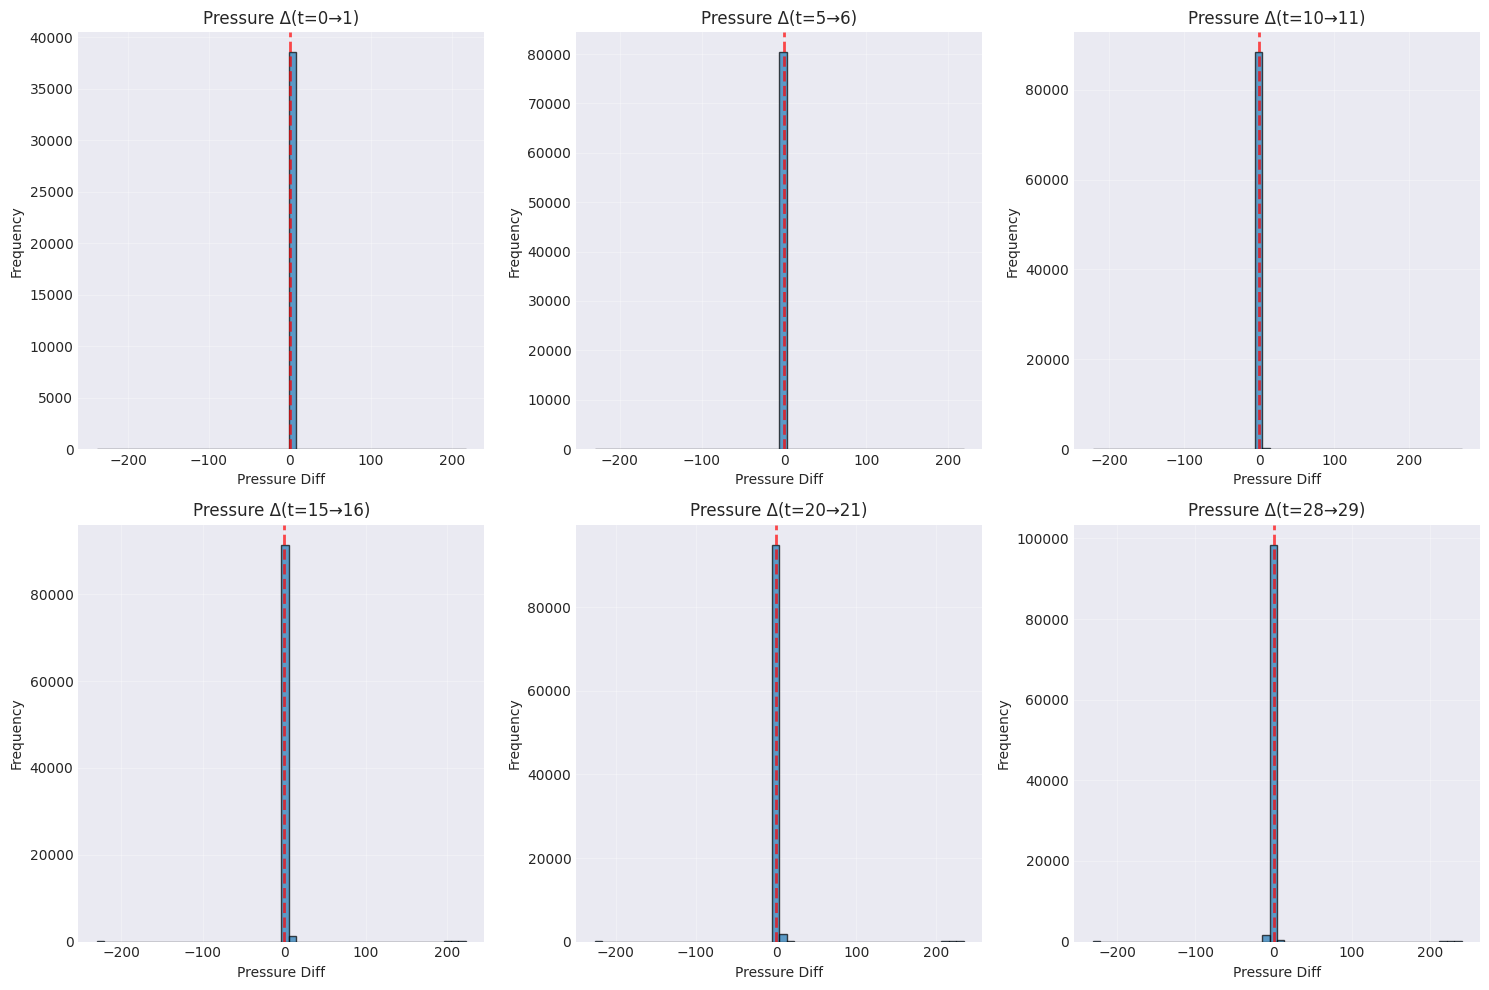

In [23]:
# Pressure: Difference histograms
if len(all_valid_diffs) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    time_steps = [0, 5, 10, 15, 20, 28]
    
    for idx, t in enumerate(time_steps):
        if t < pressure_diffs.shape[3]:
            ax = axes[idx // 3, idx % 3]
            valid_mask = (pressure[:, :, :, t] != -999) & (pressure[:, :, :, t+1] != -999)
            if np.sum(valid_mask) > 0:
                diff_t = pressure_diffs[:, :, :, t]
                valid_diff = diff_t[valid_mask]
                ax.hist(valid_diff, bins=50, edgecolor='black', alpha=0.7)
                ax.set_xlabel('Pressure Diff')
                ax.set_ylabel('Frequency')
                ax.set_title(f'Pressure Δ(t={t}→{t+1})')
                ax.axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7)
                ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [24]:
# Pressure: High variance analysis
print("\nPRESSURE VARIANCE ANALYSIS")
print("=" * 80)

pressure_for_var = pressure.astype(float)
pressure_for_var[pressure == -999] = np.nan
pressure_variance = np.nanvar(pressure_for_var, axis=3)

valid_var = pressure_variance[~np.isnan(pressure_variance)]
if len(valid_var) > 0:
    print(f"Variance statistics:")
    print(f"  Min:  {np.min(valid_var):.6e}")
    print(f"  Max:  {np.max(valid_var):.6e}")
    print(f"  Mean: {np.mean(valid_var):.6e}")
    print(f"  P90:  {np.percentile(valid_var, 90):.6e}")
    print(f"  P95:  {np.percentile(valid_var, 95):.6e}")
    print(f"  P99:  {np.percentile(valid_var, 99):.6e}")
    
    # Find top variance slices
    xy_variance_by_z = np.nanmean(pressure_variance, axis=(0, 1))
    valid_z = ~np.isnan(xy_variance_by_z)
    if np.sum(valid_z) > 0:
        top_z_indices = np.argsort(xy_variance_by_z[valid_z])[-3:][::-1]
        z_indices = np.where(valid_z)[0][top_z_indices]
        
        print(f"\nTop 3 Z slices by variance:")
        for i, z_idx in enumerate(z_indices):
            print(f"  {i+1}. Z={z_idx:3d}, variance={xy_variance_by_z[z_idx]:.6e}")


PRESSURE VARIANCE ANALYSIS
Variance statistics:
  Min:  0.000000e+00
  Max:  1.488214e+04
  Mean: 2.439591e+02
  P90:  3.294632e+02
  P95:  1.347818e+03
  P99:  3.706324e+03

Top 3 Z slices by variance:
  1. Z= 46, variance=1.048755e+03
  2. Z=  1, variance=9.554612e+02
  3. Z= 47, variance=9.287131e+02


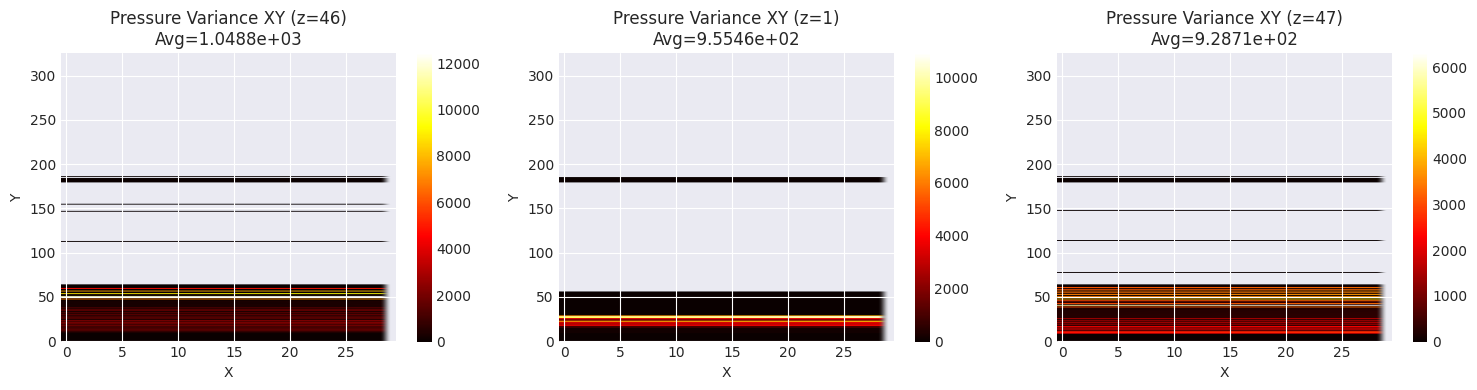

In [25]:
# Visualize high variance slices for Pressure
if len(valid_var) > 0 and 'z_indices' in locals():
    pressure_var_masked = np.ma.masked_where(np.isnan(pressure_variance), pressure_variance)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i, z_idx in enumerate(z_indices):
        im = axes[i].imshow(pressure_var_masked[:, :, z_idx].T, cmap='hot', origin='lower', aspect='auto')
        axes[i].set_title(f'Pressure Variance XY (z={z_idx})\nAvg={xy_variance_by_z[z_idx]:.4e}')
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        plt.colorbar(im, ax=axes[i])
    
    plt.tight_layout()
    plt.show()

---
## Output: Temperature - Temporal Analysis

In [26]:
# Temperature temporal differences
temperature_diffs = np.diff(temperature, axis=3)

print("TEMPERATURE TEMPORAL DIFFERENCES")
print("=" * 80)

all_temp_diffs = []
for t in range(temperature_diffs.shape[3]):
    valid_mask = (temperature[:, :, :, t] != -999) & (temperature[:, :, :, t+1] != -999)
    if np.sum(valid_mask) > 0:
        diff_t = temperature_diffs[:, :, :, t]
        all_temp_diffs.append(diff_t[valid_mask])

if len(all_temp_diffs) > 0:
    all_temp_diffs = np.concatenate(all_temp_diffs)
    temp_mean_diff = np.mean(all_temp_diffs)
    temp_std_diff = np.std(all_temp_diffs)
    
    print(f"Overall difference statistics:")
    print(f"  Mean: {temp_mean_diff:.4f}")
    print(f"  Std:  {temp_std_diff:.4f}")
    print(f"  Min:  {np.min(all_temp_diffs):.4f}")
    print(f"  Max:  {np.max(all_temp_diffs):.4f}")
    
    temp_extreme_threshold = 3 * temp_std_diff
    print(f"\nExtreme changes (±3σ):")
    for t in [0, 5, 10, 15, 20, 28]:
        if t < temperature_diffs.shape[3]:
            valid_mask = (temperature[:, :, :, t] != -999) & (temperature[:, :, :, t+1] != -999)
            if np.sum(valid_mask) > 0:
                diff_t = temperature_diffs[:, :, :, t]
                extreme_mask = np.abs(diff_t - temp_mean_diff) > temp_extreme_threshold
                num_extreme = np.sum(extreme_mask & valid_mask)
                pct = 100 * num_extreme / np.sum(valid_mask)
                print(f"  t={t:2d}->{t+1:2d}: {num_extreme:6d} extreme ({pct:5.2f}%)")

TEMPERATURE TEMPORAL DIFFERENCES
Overall difference statistics:
  Mean: 0.1829
  Std:  2.3433
  Min:  -43.8167
  Max:  44.9638

Extreme changes (±3σ):
  t= 0-> 1:      0 extreme ( 0.00%)
  t= 5-> 6:   1071 extreme ( 1.33%)
  t=10->11:   3540 extreme ( 3.99%)
  t=15->16:   1476 extreme ( 1.59%)
  t=20->21:   4097 extreme ( 4.22%)
  t=28->29:   7709 extreme ( 7.66%)


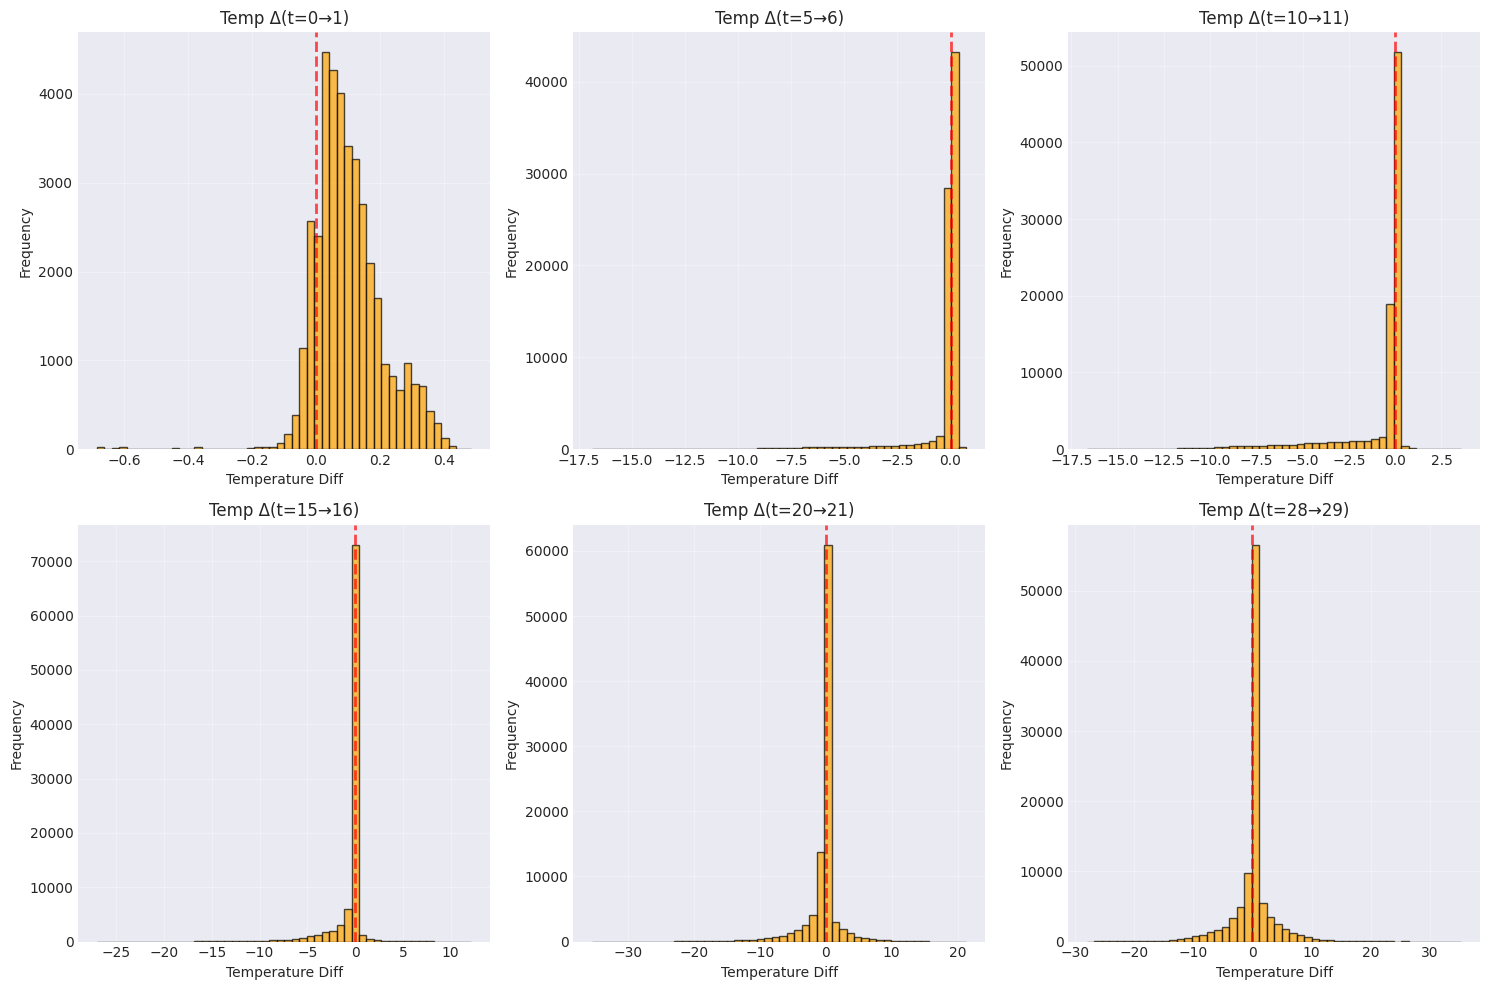


Temperature variance: min=0.000000e+00, max=7.973098e+02, mean=1.236500e+02
Top 3 Z slices: [34 35 33]


In [27]:
# Temperature: Difference histograms and variance
if len(all_temp_diffs) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Histograms
    for idx, t in enumerate([0, 5, 10, 15, 20, 28]):
        if t < temperature_diffs.shape[3]:
            ax = axes[idx // 3, idx % 3]
            valid_mask = (temperature[:, :, :, t] != -999) & (temperature[:, :, :, t+1] != -999)
            if np.sum(valid_mask) > 0:
                diff_t = temperature_diffs[:, :, :, t]
                valid_diff = diff_t[valid_mask]
                ax.hist(valid_diff, bins=50, edgecolor='black', alpha=0.7, color='orange')
                ax.set_xlabel('Temperature Diff')
                ax.set_ylabel('Frequency')
                ax.set_title(f'Temp Δ(t={t}→{t+1})')
                ax.axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7)
                ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Temperature variance
temperature_for_var = temperature.astype(float)
temperature_for_var[temperature == -999] = np.nan
temperature_variance = np.nanvar(temperature_for_var, axis=3)

valid_var = temperature_variance[~np.isnan(temperature_variance)]
if len(valid_var) > 0:
    print(f"\nTemperature variance: min={np.min(valid_var):.6e}, max={np.max(valid_var):.6e}, mean={np.mean(valid_var):.6e}")
    
    xy_temp_var = np.nanmean(temperature_variance, axis=(0, 1))
    valid_z = ~np.isnan(xy_temp_var)
    if np.sum(valid_z) > 0:
        top_temp_z = np.argsort(xy_temp_var[valid_z])[-3:][::-1]
        temp_z_indices = np.where(valid_z)[0][top_temp_z]
        print(f"Top 3 Z slices: {temp_z_indices}")

---
## Output: WEPT - Temporal Analysis

In [28]:
# WEPT temporal differences
wept_diffs = np.diff(wept, axis=3)

print("WEPT TEMPORAL DIFFERENCES")
print("=" * 80)

all_wept_diffs = []
for t in range(wept_diffs.shape[3]):
    valid_mask = (wept[:, :, :, t] != -999) & (wept[:, :, :, t+1] != -999)
    if np.sum(valid_mask) > 0:
        diff_t = wept_diffs[:, :, :, t]
        all_wept_diffs.append(diff_t[valid_mask])

if len(all_wept_diffs) > 0:
    all_wept_diffs = np.concatenate(all_wept_diffs)
    wept_mean_diff = np.mean(all_wept_diffs)
    wept_std_diff = np.std(all_wept_diffs)
    
    print(f"Overall difference statistics:")
    print(f"  Mean: {wept_mean_diff:.6e}")
    print(f"  Std:  {wept_std_diff:.6e}")
    print(f"  Min:  {np.min(all_wept_diffs):.6e}")
    print(f"  Max:  {np.max(all_wept_diffs):.6e}")
    
    
    wept_extreme_threshold = 3 * wept_std_diff
    print(f"\nExtreme changes (±3σ):")
    for t in [0, 5, 10, 15, 20, 28]:
        if t < wept_diffs.shape[3]:
            valid_mask = (wept[:, :, :, t] != -999) & (wept[:, :, :, t+1] != -999)
            if np.sum(valid_mask) > 0:
                diff_t = wept_diffs[:, :, :, t]
                extreme_mask = np.abs(diff_t - wept_mean_diff) > wept_extreme_threshold
                num_extreme = np.sum(extreme_mask & valid_mask)
                pct = 100 * num_extreme / np.sum(valid_mask)
                print(f"  t={t:2d}->{t+1:2d}: {num_extreme:6d} extreme ({pct:5.2f}%)")
else:
    print("No valid WEPT differences found.")

WEPT TEMPORAL DIFFERENCES
No valid WEPT differences found.


In [29]:
# WEPT: Difference histograms
if len(all_wept_diffs) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for idx, t in enumerate([0, 5, 10, 15, 20, 28]):
        if t < wept_diffs.shape[3]:
            ax = axes[idx // 3, idx % 3]
            valid_mask = (wept[:, :, :, t] != -999) & (wept[:, :, :, t+1] != -999)
            if np.sum(valid_mask) > 0:
                diff_t = wept_diffs[:, :, :, t]
                valid_diff = diff_t[valid_mask]
                ax.hist(valid_diff, bins=50, edgecolor='black', alpha=0.7, color='purple')
                ax.set_xlabel('WEPT Diff')
                ax.set_ylabel('Frequency')
                ax.set_title(f'WEPT Δ(t={t}→{t+1})')
                ax.axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7)
                ax.grid(True, alpha=0.3)
                ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    
    plt.tight_layout()
    plt.show()

# WEPT variance
wept_for_var = wept.astype(float)
wept_for_var[wept == -999] = np.nan
wept_variance = np.nanvar(wept_for_var, axis=3)

valid_var = wept_variance[~np.isnan(wept_variance)]
if len(valid_var) > 0:
    print(f"\nWEPT variance: min={np.min(valid_var):.6e}, max={np.max(valid_var):.6e}, mean={np.mean(valid_var):.6e}")


WEPT variance: min=0.000000e+00, max=4.363518e+23, mean=3.710593e+22


---
## Field-Level Time Series

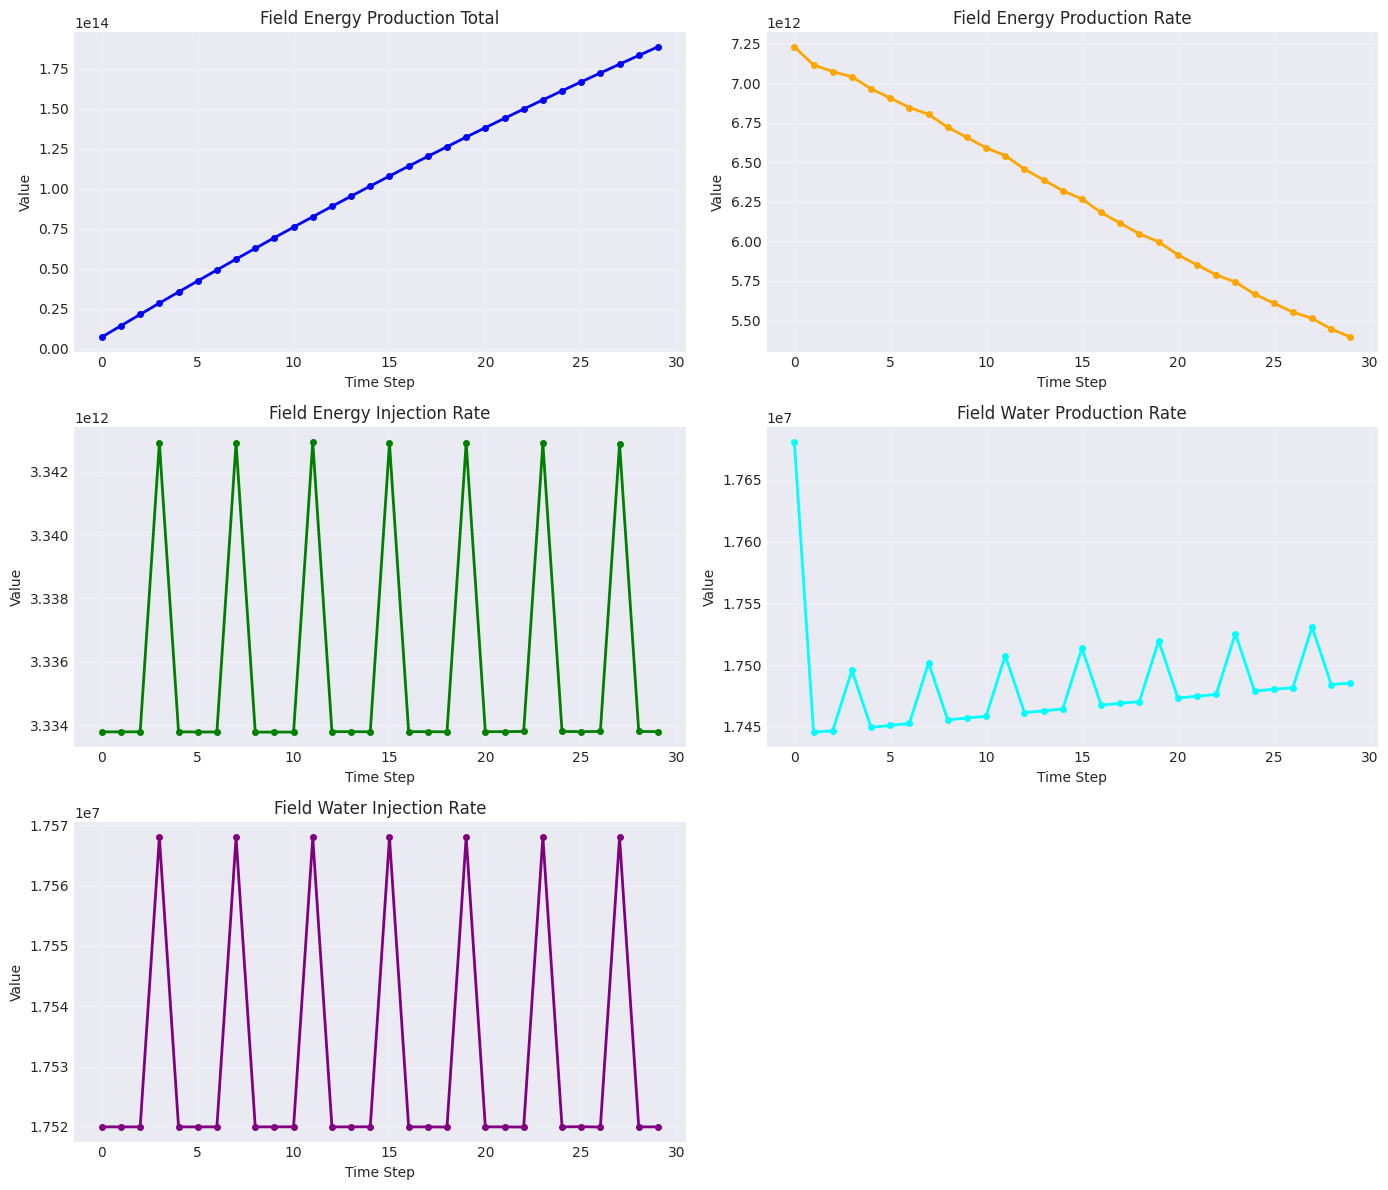

In [30]:
# Load and analyze field-level metrics
field_energy_total = f['Output/FieldEnergyProductionTotal'][:]
field_energy_rate = f['Output/FieldEnergyProductionRate'][:]
field_energy_inj = f['Output/FieldEnergyInjectionRate'][:]
field_water_prod = f['Output/FieldWaterProductionRate'][:]
field_water_inj = f['Output/FieldWaterInjectionRate'][:]

# Plot all field-level metrics
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

metrics = [
    (field_energy_total, 'Field Energy Production Total', 'blue'),
    (field_energy_rate, 'Field Energy Production Rate', 'orange'),
    (field_energy_inj, 'Field Energy Injection Rate', 'green'),
    (field_water_prod, 'Field Water Production Rate', 'cyan'),
    (field_water_inj, 'Field Water Injection Rate', 'purple')
]

for idx, (data, title, color) in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    valid_mask = data != -999
    if np.sum(valid_mask) > 0:
        time_indices = np.where(valid_mask)[0]
        valid_values = data[valid_mask]
        ax.plot(time_indices, valid_values, 'o-', linewidth=2, markersize=4, color=color)
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Value')
        ax.set_title(title)
        ax.grid(True, alpha=0.3)
        ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

---
## Cleanup

In [32]:
# Close the HDF5 file
f.close()
print("Analysis complete. HDF5 file closed.")

Analysis complete. HDF5 file closed.


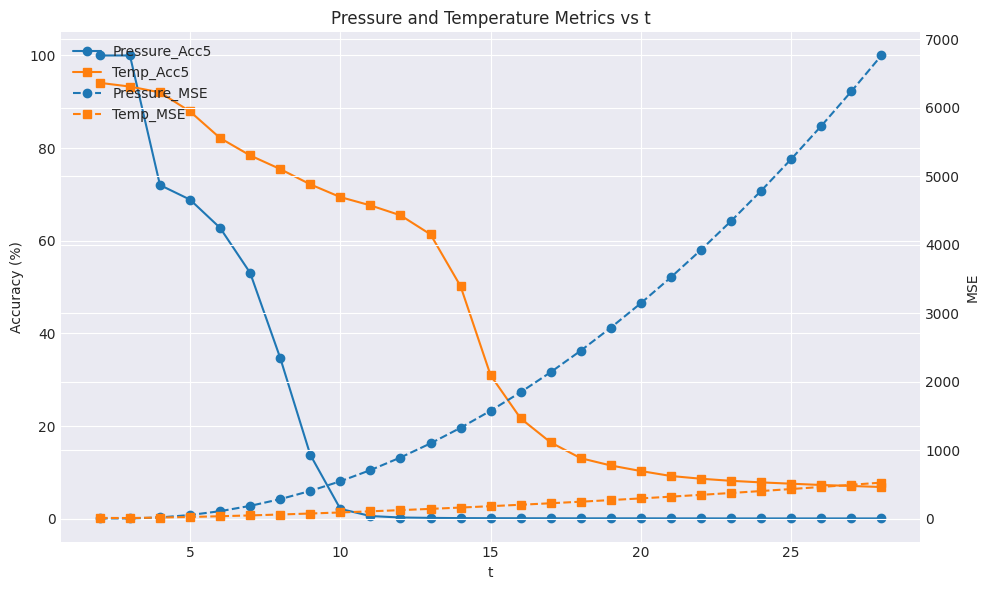

In [33]:
import matplotlib.pyplot as plt

# Data
t = list(range(2, 29))

Pressure_Acc5 = [100.00, 100.00, 72.03, 68.88, 62.78, 53.07, 34.71, 13.80, 2.12,
                 0.58, 0.26, 0.18, 0.13, 0.11, 0.10, 0.09, 0.08, 0.08, 0.08,
                 0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06]

Pressure_MSE = [1.04, 1.10, 15.62, 50.89, 107.09, 184.33, 282.74, 402.45, 543.64,
                706.30, 890.55, 1096.45, 1324.15, 1573.30, 1844.06, 2136.56,
                2450.83, 2786.74, 3143.87, 3522.34, 3922.13, 4342.85, 4784.56,
                5247.17, 5730.64, 6234.82, 6759.48]

Temp_Acc5 = [94.09, 93.29, 92.03, 87.91, 82.17, 78.42, 75.48, 72.18, 69.43,
             67.64, 65.50, 61.38, 50.19, 30.95, 21.64, 16.46, 13.06, 11.49,
             10.29, 9.22, 8.63, 8.18, 7.84, 7.56, 7.28, 7.07, 6.84]

Temp_MSE = [8.83, 6.97, 13.65, 22.49, 33.09, 45.12, 58.43, 72.87, 88.38, 104.86,
            122.27, 140.60, 159.83, 179.92, 200.89, 222.74, 245.49, 269.10,
            293.63, 319.07, 345.45, 372.77, 401.06, 430.33, 460.62, 491.91,
            524.26]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis for Acc5
ax1.plot(t, Pressure_Acc5, marker='o', label='Pressure_Acc5')
ax1.plot(t, Temp_Acc5, marker='s', label='Temp_Acc5')
ax1.set_xlabel('t')
ax1.set_ylabel('Accuracy (%)')
ax1.grid(True)

# Right y-axis for MSE
ax2 = ax1.twinx()
ax2.plot(t, Pressure_MSE, linestyle='--', marker='o', label='Pressure_MSE')
ax2.plot(t, Temp_MSE, linestyle='--', marker='s', label='Temp_MSE')
ax2.set_ylabel('MSE')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Pressure and Temperature Metrics vs t')
plt.tight_layout()
plt.show()
